In [40]:
import pandas as pd 
import sklearn
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from scipy.stats import ttest_1samp

# Importing the data

In [32]:
# Importing data
df = pd.read_stata("bwght2.dta")
print(df.head())
print(df.shape)

   mage  meduc  monpre  npvis  fage  feduc  bwght  omaps  fmaps  cigs  ...  \
0    26   12.0     2.0   12.0  34.0   16.0   3060    9.0    9.0   0.0  ...   
1    29   12.0     2.0   12.0  32.0   12.0   3730    8.0    9.0   NaN  ...   
2    33   12.0     1.0   12.0  36.0   16.0   2530    8.0    9.0   0.0  ...   
3    28   17.0     5.0    8.0  32.0   17.0   3289    8.0    9.0   0.0  ...   
4    23   13.0     2.0    6.0  24.0   16.0   3590    6.0    8.0   0.0  ...   

   male  mwhte  mblck  moth  fwhte  fblck  foth    lbwght  magesq  npvissq  
0     1      0      0     1      0      0     1  8.026170     676    144.0  
1     0      1      0     0      1      0     0  8.224163     841    144.0  
2     0      1      0     0      1      0     0  7.835975    1089    144.0  
3     1      1      0     0      1      0     0  8.098339     784     64.0  
4     1      1      0     0      1      0     0  8.185907     529     36.0  

[5 rows x 23 columns]
(1832, 23)


In [18]:
df.describe()

,mage,meduc,monpre,npvis,fage,feduc,bwght,omaps,fmaps,cigs,...,male,mwhte,mblck,moth,fwhte,fblck,foth,lbwght,magesq,npvissq
count,1832.000000,1802.000000,1827.000000,1764.000000,1826.000000,1785.000000,1832.000000,1829.000000,1829.000000,1722.000000,...,1832.000000,1832.000000,1832.000000,1832.000000,1832.000000,1832.000000,1832.000000,1832.000000,1832.000000,1764.000000
mean,29.557860,13.718091,2.122058,11.620181,31.918949,13.915406,3401.122271,8.386003,9.003827,1.089431,...,0.513646,0.886463,0.059498,0.054039,0.889738,0.058406,0.051856,8.114244,896.417031,148.569161
std,4.770991,2.092369,1.233385,3.680791,5.713047,2.266473,576.544431,1.121083,0.479887,4.222476,...,0.499950,0.317335,0.236619,0.226157,0.313302,0.234574,0.221797,0.203177,285.409099,112.902763
min,16.000000,3.000000,0.000000,0.000000,18.000000,3.000000,360.000000,0.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.886104,256.000000,0.000000
25%,26.000000,12.000000,1.000000,10.000000,28.000000,12.000000,3076.000000,8.000000,9.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,8.031385,676.000000,100.000000
50%,29.000000,13.000000,2.000000,12.000000,31.000000,14.000000,3425.000000,9.000000,9.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,8.138857,841.000000,144.000000
75%,33.000000,16.000000,2.000000,13.000000,35.000000,16.000000,3770.000000,9.000000,9.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,8.234830,1089.000000,169.000000
max,44.000000,17.000000,9.000000,40.000000,64.000000,17.000000,5204.000000,10.000000,10.000000,40.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.557183,1936.000000,1600.000000


# Checking for null values

In [27]:
df.isna().any()

mage       False
meduc       True
monpre      True
npvis       True
fage        True
feduc       True
bwght      False
omaps       True
fmaps       True
cigs        True
drink       True
lbw        False
vlbw       False
male       False
mwhte      False
mblck      False
moth       False
fwhte      False
fblck      False
foth       False
lbwght     False
magesq     False
npvissq     True
dtype: bool

# Q1a: What is the average birth weight for the babies in this sample?

In [8]:
df["bwght"].mean()

3401.122270742358

# Q1b: Find the median birth weight

In [9]:
df["bwght"].median()

3425.0

# Q1c: Draw the empirical histogram for the birth weight

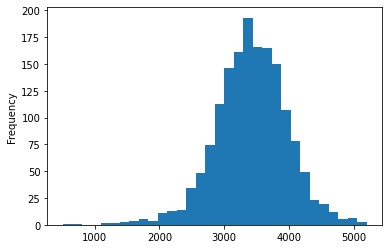

In [59]:
df["bwght"].plot(kind = "hist", bins = 32)

# Q1d: What is the Interpretation of beta_3? Find out the OLS estimate.

In [33]:
# Removing null values
df = df.dropna()


# Setting up the Regression Model

X = df[["npvis", "npvissq", "cigs", "male"]]
X = sm.add_constant(X)
y = df["bwght"]


model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

# Beta_3's estimate is -9.6390. The interpretation of beta_3 is that for every additional cigarette smoked per day on average during preganncy, the birth weigh  decreases by -9.6390grams on average, ceteris paribus.


                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     7.502
Date:                Thu, 21 Jan 2021   Prob (F-statistic):           5.50e-06
Time:                        11:52:21   Log-Likelihood:                -12479.
No. Observations:                1612   AIC:                         2.497e+04
Df Residuals:                    1607   BIC:                         2.500e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3184.1921     80.798     39.409      0.0

# Question 1e) Test the null hypothesis that beta_3 = -10 against the alternative beta_3 != -10 at 5% significance level

In [39]:
results.conf_int(alpha = 0.05, cols = None)

# Fail to reject the null hypothesis that beta_3 = -10 at alpha = 0.05, since -10 falls within the 95% confidence interval

,0,1
const,3025.711015,3342.673096
npvis,0.139910,41.547172
npvissq,-0.989161,0.351102
cigs,-16.393402,-2.884690
male,34.622540,143.757504


# Question 1f) Test the hypothesis that newborn boys weigh by 100grams more than newborn girls at 95% confidence interval. Write down the null and alternative hypothesis.

- H_0: newborn boys weigh 100grams compared to newborn girls (beta_4 = 100)

- H_A: newborn boys weigh less than or more than 100 grams compared to newborn girls (beta_4 != 100)

In [60]:
hypothesis = "male = 100"

t_test = results.t_test(hypothesis)
print(t_test)
print(t_test.pvalue)

# p value = 0.6976 > 0.05, therefore we fail to reject the null hypothesis at alpha = 0.05

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            89.1900     27.820     -0.389      0.698      34.623     143.758
0.6976477702386644


# Q1g) What is the partial effect of the number of prenatal doctor visits (npvis) on birth weight?

In [ ]:
# Manually calculate the partial derivative

# Q1h) At what point does one more time of prenatal doctor visits (npvis) reduce the birth weight of the baby? Explain the economic intuition of your result.

In [ ]:
# Set the partial derivative to 0 and solve, since that is the threshold to find the point of diminishing returns

# More doctor visits could imply a health issue, which would affect the birth weight of the newborn

# Q1i) Is the homoskedasticity assumption met? If not, how would you solve the problem?

In [58]:
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white

white_test = het_white(results.resid, results.model.exog)
bp_test = het_breuschpagan(results.resid, results.model.exog)

labels = ["LM Statistic", "LM-Test p-value", "F-Statistic", "F-Test p-value"]
print(dict(zip(labels, bp_test)))
print(dict(zip(labels, white_test)))

# If p < 0.05, the model is heteroskedastic. In this case, p values are both > 0.05, meaning that there is homoskedasticity. 

# If not, you can always use robust standard error with large sample sizes

{'LM Statistic': 7.7372795367985425, 'LM-Test p-value': 0.1016901149630073, 'F-Statistic': 1.9376203250620512, 'F-Test p-value': 0.10171518790419122}
{'LM Statistic': 17.371084817685176, 'LM-Test p-value': 0.13616342067379827, 'F-Statistic': 1.4515584346417778, 'F-Test p-value': 0.13590224227915085}


# Q1j) Do you think that the zero conditional mean assumption holds in this regression model? Why or why not?

In [ ]:
# Yes... It is very likely that an excluded variable is highly correlated with the indepedent variables. For example, one of the error term variables could be the welath of the family, which easily correlates with the number of doctor visits.